In [1]:
# load libraries
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import random
from math import sqrt

In [2]:
# compute dot
def dot(dim):
    dist = 0
    dotx = [None] * dim
    for coord in range(dim):
        dotx[coord] = random.uniform(-0.5, 0.5)
        dist += dotx[coord] ** 2
    return dotx, sqrt(dist)

In [3]:
# set variables
d_max = 20
points = 10 ** 7
dims = []
ratios = []

<IPython.core.display.Javascript object>


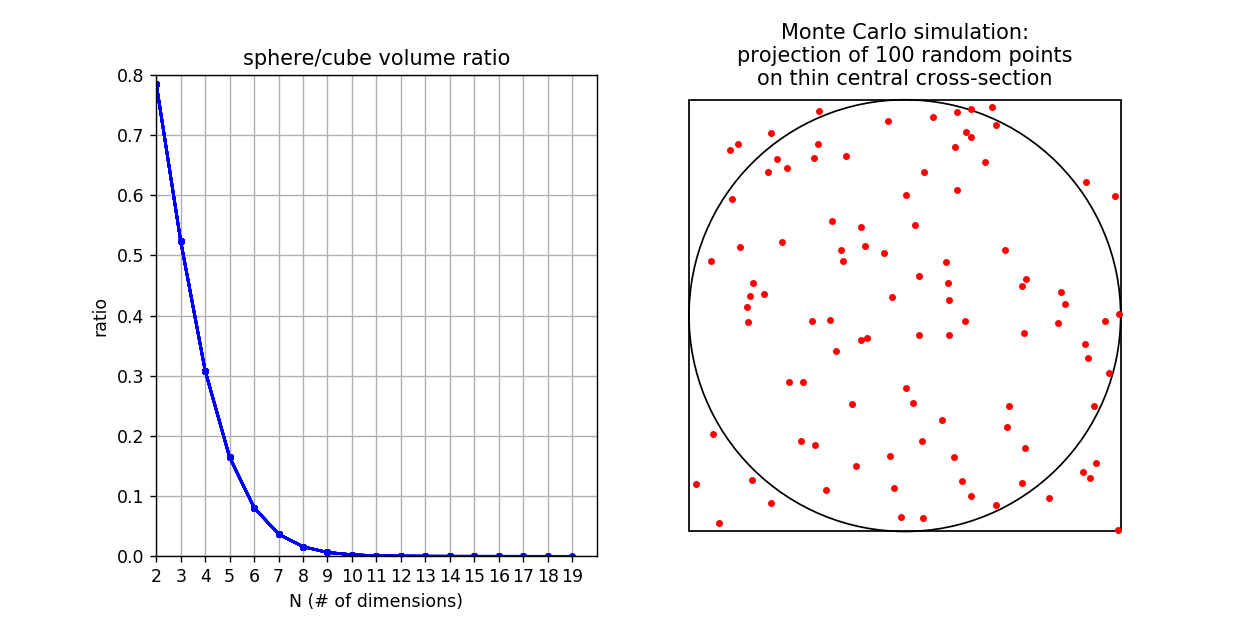

In [4]:
# initialize plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.set_xlabel('N (# of dimensions)')
ax1.set_ylabel('ratio')
ax1.set_title('sphere/cube volume ratio')
ax1.set_xlim(2, d_max)
ax1.set_ylim(0, 0.8)
ax1.set_xscale('linear')
ax1.set_yscale('linear')
ax1.set_xticks(range(2, d_max))
ax1.grid()
square1 = plt.Rectangle((-0.5, -0.5), 1, 1, linewidth = 1, edgecolor='black', facecolor='white')
circle1 = plt.Circle((0, 0), 0.5, color='black', fill=False)

In [5]:
# main loop
for d in range(2, d_max):
    p_int = 0
    ax2.clear()
    ax2.set_aspect(1.0)
    ax2.set_xscale('linear')
    ax2.set_yscale('linear')
    ax2.set_axis_off()
    ax2.set_xlim(-0.51, 0.51)
    ax2.set_ylim(-0.51, 0.51)
    ax2.set_title('Monte Carlo simulation:\nprojection of 100 random points\non thin central cross-section')
    ax2.add_artist(square1)
    ax2.add_artist(circle1)
    # generate all points
    pts = np.random.random_sample((points, d)) - 0.5
    # raise coords to the power of 2
    pts2 = np.power(pts, 2)
    # sum up all coords for each point
    dists = np.sum(pts2, axis = 1)
    ## square root of sum - it's the distance to origin
    dists = np.power(dists, 0.5)
    # this many are within the sphere (distance to origin  <= 0.5)
    p_int = (dists <= 0.5).sum()
    # plot the first 100 dots
    ax2.plot(pts[:100, 0], pts[:100, 1], '.r')
    ratio = p_int / points
    dims.append(d)
    ratios.append(ratio)
    ax1.plot(dims, ratios, '.b-')
    fig.canvas.draw()
    print(d, ratio)
    if p_int == 0:
        break

2 0.7853699
3 0.5236641
4 0.3083161
5 0.1644069
6 0.0807334
7 0.0368443
8 0.015874
9 0.0064268
10 0.0024887
11 0.0009035
12 0.0003304
13 0.000111
14 3.61e-05
15 1.05e-05
16 4e-06
17 1.6e-06
18 1e-07
19 1e-07
